In [71]:
from load_data import load_data
import numpy as np
from sklearn.neural_network import MLPClassifier, MLPRegressor
from accuracy_score import accuracy_score
from sklearn.model_selection import train_test_split
from GridSearch import *
import pandas as pd
from mean_square_error import MSE
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [83]:
headers, data = load_data()
Y = data[:,4]
X = np.delete(data,4,1)
headers = np.delete(headers, 4)


idx_change = [0,2,3]
lookupTable = []
for idx in range(len(headers)):
    tmp = []
    if idx in idx_change:
        tmp, X[:,idx] = np.unique(data[:,idx], return_inverse=True)
    lookupTable.append(tmp)


print(headers)
X[:,7] = np.array([s.replace(",", "") for s in X[:,7]])
#X[:,7] = X[:,7].astype(np.float64)
X = X.astype(np.float64)
for i in range(len(X[0])):
    print(type(X[0][i]))

X[:,7] /= 1000 #dividing to get slightly smaller numbers
print(X[:,7])

#remove nan from Y
for i in range(len(Y)):
    if Y[i] != Y[i]:
        Y[i] = 0

print(np.max(Y), np.min(Y), np.mean(Y))
y_mean = np.mean(Y)

['country' 'year' 'sex' 'age' 'population' 'suicides/100k pop'
 'HDI for year' ' gdp_for_year ($) ' 'gdp_per_capita ($)']
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
[2.15662490e+06 2.15662490e+06 2.15662490e+06 ... 1.95000000e+10
 6.42339669e+07 6.20813233e+07]
22338.0 0.0 228.1753054540874


In [84]:
#Changing to classification problem
Y_class = np.where(Y > y_mean, 1, 0)
print(Y_class)

[0 0 0 ... 1 0 0]


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_class, test_size = 0.25)

In [6]:
layers = [18,15,12,8]
#model = MLPClassifier(hidden_layer_sizes=layers, activation="relu", max_iter=500, alpha=1.0)
#model = MLPRegressor(hidden_layer_sizes=layers)
model = MLPClassifier()
model.fit(X_train, Y_train)


MLPClassifier()

In [7]:

Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))



[[6306  916]
 [ 257  460]]
0.8522483940042827


alpha:1e-05, momentum :1e-06 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :1e-05 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :0.0001 gives accuracy 0.39337448041315026
alpha:1e-05, momentum :0.001 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :0.01 gives accuracy 0.7945585086282907
alpha:1e-05, momentum :0.1 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :1.0 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :1e-06 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :1e-05 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :0.0001 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :0.001 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :0.01 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :0.1 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :1.0 gives accuracy 0.8187429147247764
alpha:0.001, momentum :1e-06 gives accuracy 0.48494772641390604
alpha:0.001, momentum :1e-05 gives accuracy 0.71016500

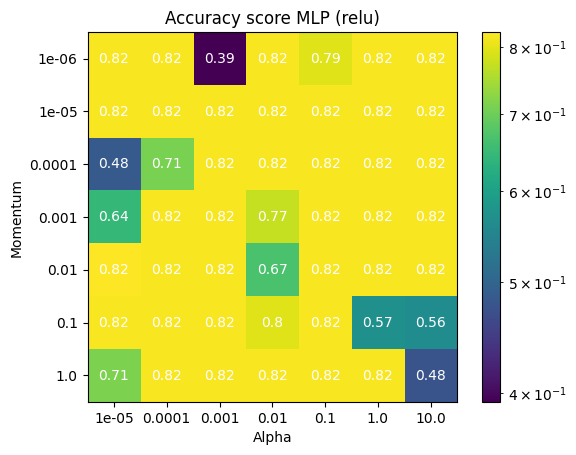

In [69]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (relu)", func="relu", verbose=True)

alpha:1e-05, momentum :1e-06 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :1e-05 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :0.0001 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :0.001 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :0.01 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :0.1 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :1.0 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :1e-06 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :1e-05 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :0.0001 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :0.001 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :0.01 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :0.1 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :1.0 gives accuracy 0.8187429147247764
alpha:0.001, momentum :1e-06 gives accuracy 0.8187429147247764
alpha:0.001, momentum :1e-05 gives accuracy 0.8187429147

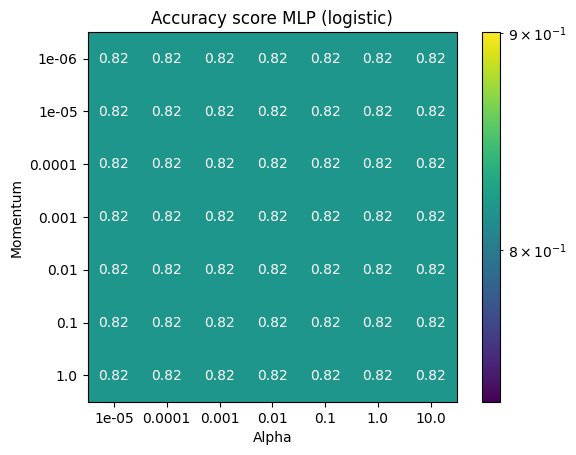

In [70]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (logistic)", func="logistic", verbose=True)

alpha:1e-05, momentum :1e-06 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :1e-05 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :0.0001 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :0.001 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :0.01 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :0.1 gives accuracy 0.8187429147247764
alpha:1e-05, momentum :1.0 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :1e-06 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :1e-05 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :0.0001 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :0.001 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :0.01 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :0.1 gives accuracy 0.8187429147247764
alpha:0.0001, momentum :1.0 gives accuracy 0.8187429147247764
alpha:0.001, momentum :1e-06 gives accuracy 0.8187429147247764
alpha:0.001, momentum :1e-05 gives accuracy 0.8187429147

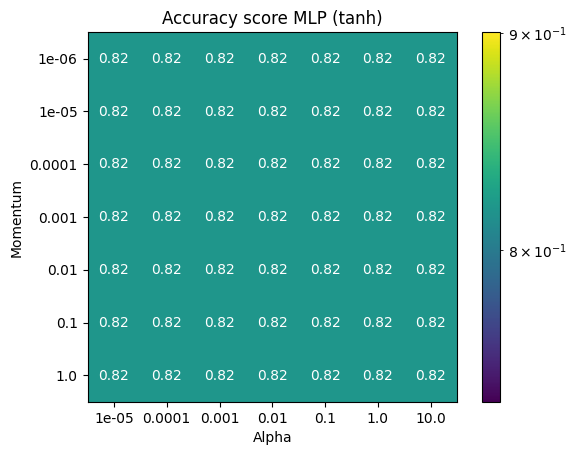

In [71]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (tanh)", func="tanh", verbose=True)


We now want to look at F1 scores for a more accurate measurement.

In [9]:

from sklearn.metrics import f1_score
model = MLPClassifier(activation="relu").fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(f1_score(Y_test, Y_pred))

0.49439028876218505


In [10]:
print(accuracy_score(Y_test,Y_pred))
print(f1_score(Y_test, Y_pred))


[[3846 2717]
 [  32 1344]]
0.6537347272956292
0.49439028876218505


alpha:1e-05, momentum :1e-06 gives f1 score 0.5546588407923698
alpha:1e-05, momentum :1e-05 gives f1 score 0.18534752661239826
alpha:1e-05, momentum :0.0001 gives f1 score 0.5583333333333333
alpha:1e-05, momentum :0.001 gives f1 score 0.0
alpha:1e-05, momentum :0.01 gives f1 score 0.1789838337182448
alpha:1e-05, momentum :0.1 gives f1 score 0.6025559105431311
alpha:1e-05, momentum :1.0 gives f1 score 0.6015473887814313
alpha:0.0001, momentum :1e-06 gives f1 score 0.5991706979958534
alpha:0.0001, momentum :1e-05 gives f1 score 0.16449704142011834
alpha:0.0001, momentum :0.0001 gives f1 score 0.5914770906760652
alpha:0.0001, momentum :0.001 gives f1 score 0.548317823908375
alpha:0.0001, momentum :0.01 gives f1 score 0.5337883959044368
alpha:0.0001, momentum :0.1 gives f1 score 0.0
alpha:0.0001, momentum :1.0 gives f1 score 0.03968816442239547
alpha:0.001, momentum :1e-06 gives f1 score 0.0
alpha:0.001, momentum :1e-05 gives f1 score 0.6068281938325991
alpha:0.001, momentum :0.0001 gives 

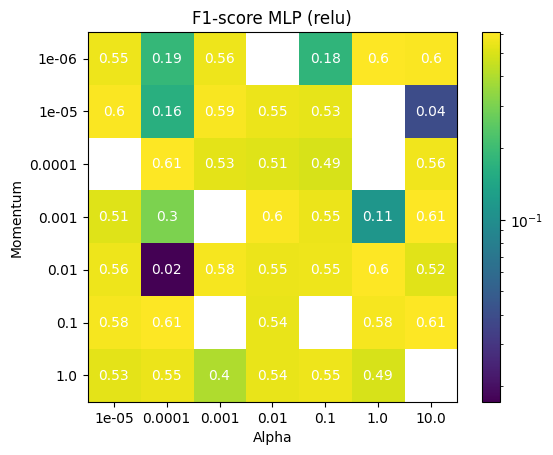

In [12]:
grid_search_hyperparameters_MLP_F1(X_train, X_test, Y_train, Y_test, "F1-score MLP (relu)", func="relu", verbose=True)

0
1
2
3
4
5
6


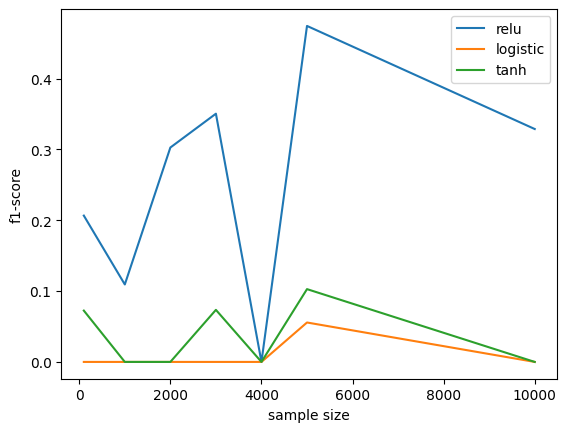

In [18]:
M_list = [100,1000,2000, 3000, 4000, 5000, 10000]
length = len(M_list)
tanh_arr = np.zeros(length)
relu_arr = np.zeros(length)
logistic_arr = np.zeros(length)

for i,M in enumerate(M_list):
    print(i)
    n = len(Y_class)
    m = int(n/M)
    random_index = np.random.randint(m)*M   
    new_X = X[random_index:random_index+M]
    new_Y = Y_class[random_index:random_index+M]

    model = MLPClassifier(activation="tanh", max_iter=10000)
    model.fit(new_X, new_Y)
    Y_pred = model.predict(X)
    acc = f1_score(Y_pred, Y_class)
    tanh_arr[i] = acc

    model = MLPClassifier(activation="logistic", max_iter=10000)
    model.fit(new_X, new_Y)
    Y_pred = model.predict(X)
    acc = f1_score(Y_pred, Y_class)
    logistic_arr[i] = acc

    model = MLPClassifier(activation="relu", max_iter=10000)
    model.fit(new_X, new_Y)
    Y_pred = model.predict(X)
    acc = f1_score(Y_pred, Y_class)
    relu_arr[i] = acc

plt.plot(M_list, relu_arr, label="relu")
plt.plot(M_list, logistic_arr, label="logistic")
plt.plot(M_list, tanh_arr, label="tanh")
plt.ylabel("f1-score")
plt.xlabel("sample size")
plt.legend()
plt.savefig("../figures/f1_scores")

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train,Y_train)

RandomForestClassifier(random_state=1)

In [21]:
Y_pred = forest.predict(X_test)
print(accuracy_score(Y_pred, Y_test))
print(f1_score(Y_pred, Y_test))



[[6543   27]
 [  20 1349]]
0.9940798589242977
0.9828779599271401


Now removing "suicides per 100k pop", since it gives away too much information.

In [96]:
new_X_train = np.delete(X_train, 5, 1)
new_X_test = np.delete(X_test, 5, 1)
new_X_Full = np.delete(X,5,1)
new_headers = np.delete(headers, 5)
print(new_headers)

forest = RandomForestClassifier(random_state=1)
forest.fit(new_X_train,Y_train)
Y_pred = forest.predict(new_X_test)
print(accuracy_score(Y_pred, Y_test))
print(f1_score(Y_pred, Y_test))


['country' 'year' 'sex' 'age' 'population' 'HDI for year'
 ' gdp_for_year ($) ' 'gdp_per_capita ($)']
[[6605   88]
 [  36 1210]]
0.9843809043960197
0.9512578616352201


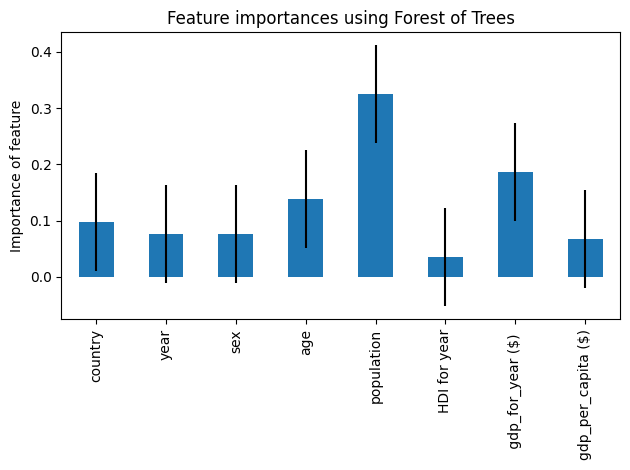

In [88]:
importances = forest.feature_importances_
std = np.std(importances)
forest_importances = pd.Series(importances, index=new_headers)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Forest of Trees")
ax.set_ylabel("Importance of feature")
fig.tight_layout()
plt.savefig("../figures/Feature_importance.png")

Here we can see that population is the biggest contributor to number of suicides. This is to be expected, since the bigger the population, the more people there are, and the bigger the number of suicides get.

0
1
2
3
4
5
6


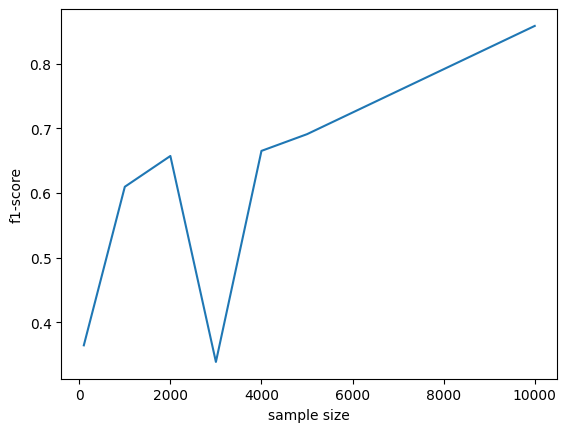

In [29]:
forest_arr = np.zeros(len(M_list))
for i,M in enumerate(M_list):
    print(i)
    n = len(Y)
    m = int(n/M)
    random_index = np.random.randint(m)*M   
    new_X = new_X_Full[random_index:random_index+M]
    new_Y = Y_class[random_index:random_index+M]

    forest.fit(new_X, new_Y)
    Y_pred = forest.predict(new_X_Full)
    acc = f1_score(Y_class, Y_pred)
    forest_arr[i] = acc

plt.plot(M_list, forest_arr)
plt.xlabel("sample size")
plt.ylabel("f1-score")
plt.savefig("../figures/f1_score_forest")

We now want to study which age groups and which countries have the highest suicide rates.
Here we use death rate instead of total number of deaths, since it gives a better indication on suicides.

In [99]:
print(headers)

['country' 'year' 'sex' 'age' 'population' 'suicides/100k pop'
 'HDI for year' ' gdp_for_year ($) ' 'gdp_per_capita ($)']


In [100]:
Y_deathrate = X[:,5]

countries = X[:,0]
Age = X[:,3] 
genders = X[:,2]

deaths_age = {i:0 for i in np.unique(Age)}
deaths_countries = {i:0 for i in np.unique(countries)}
deaths_genders = {i:0 for i in np.unique(genders)}

for i in range(len(Y)):
    deaths_age[Age[i]] += Y_deathrate[i]
    deaths_countries[countries[i]] += Y_deathrate[i]
    deaths_genders[genders[i]] += Y_deathrate[i]



[(82.0, 19265.354105444992), (85.0, 11327.335292240004), (59.0, 10685.115617238993), (45.0, 10205.526297871993), (53.0, 9572.178273995993), (6.0, 9128.374664240999), (107.0, 8972.677880563995), (51.0, 8056.612843291), (37.0, 7967.2658575159985), (12.0, 7931.355457877004)]


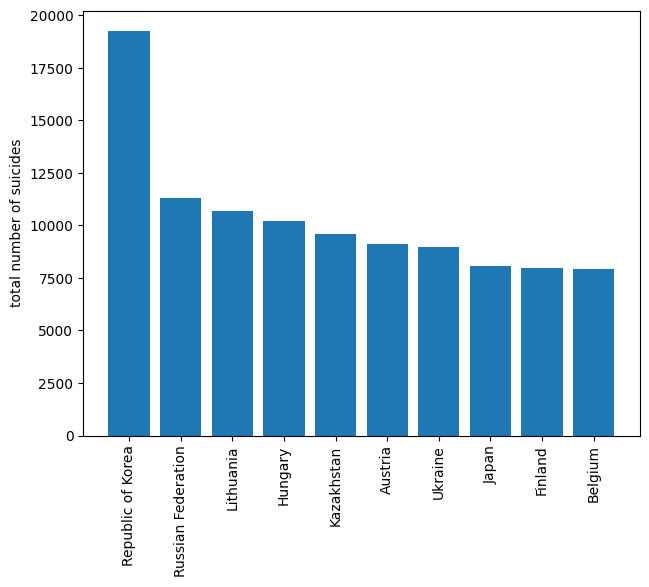

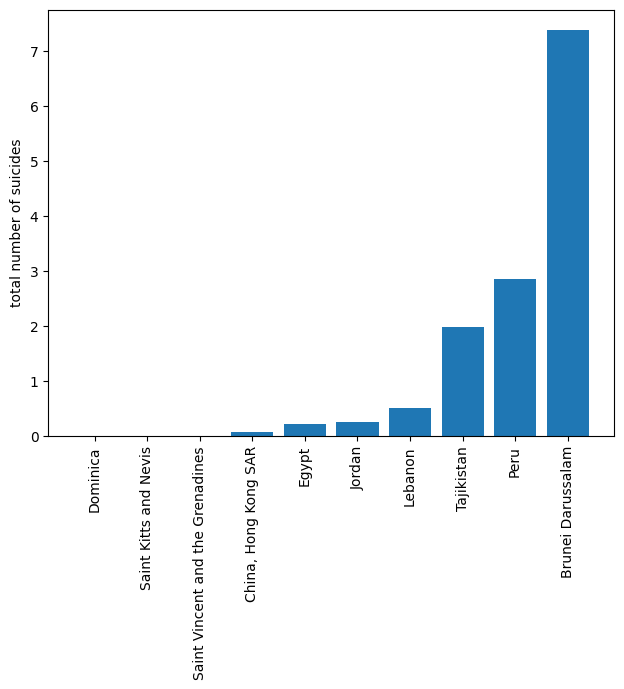

In [135]:
import heapq
top_10 = heapq.nlargest(10, deaths_countries.items(), key=lambda i: i[1])
bottom_10 = heapq.nsmallest(10, deaths_countries.items(), key=lambda i: i[1])
print(top_10)
top_10_list = [lookupTable[0][int(item[0])] for item in top_10]

plt.bar([lookupTable[0][int(item[0])] for item in top_10], [item[1] for item in top_10])
plt.gcf()
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.ylabel("total number of suicides")
plt.show()

plt.bar([lookupTable[0][int(item[0])] for item in bottom_10], [item[1] for item in bottom_10])
plt.gcf()
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.ylabel("total number of suicides")
plt.show()


Text(0.5, 0, 'countries, labeled by numbers')

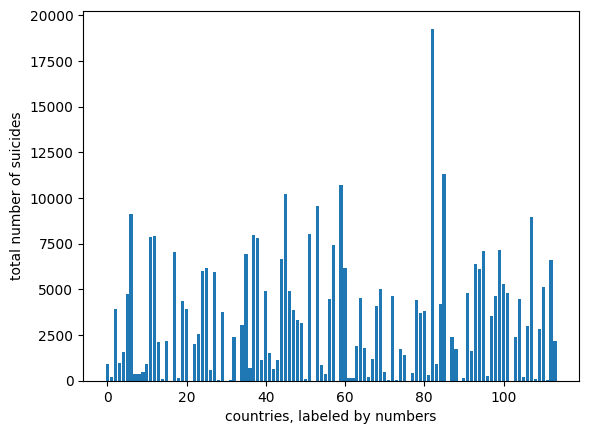

In [141]:
plt.bar(range(len(lookupTable[0])), deaths_countries.values())
plt.ylabel("total number of suicides")
plt.xlabel("countries, labeled by numbers")

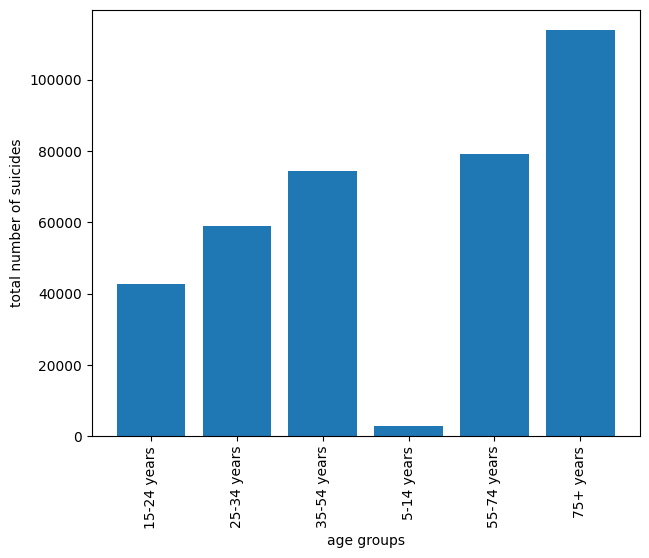

In [142]:
plt.bar(lookupTable[3], deaths_age.values())
plt.gcf()
plt.tight_layout()
plt.ylabel("total number of suicides")
plt.xlabel("age groups")
plt.xticks(rotation='vertical')
plt.show()

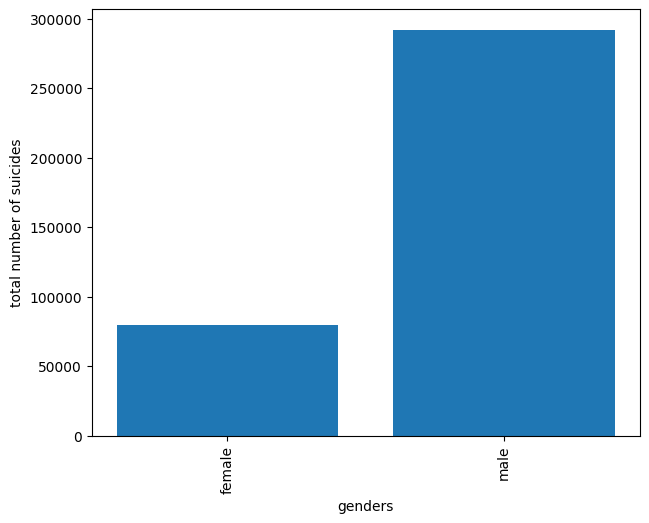

In [143]:
plt.bar(lookupTable[2], deaths_genders.values())
plt.gcf()
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.ylabel("total number of suicides")
plt.xlabel("genders")
plt.show()

We now want to look at GDP per capita and suicide rates

Text(0, 0.5, 'Suicides per 100k population')

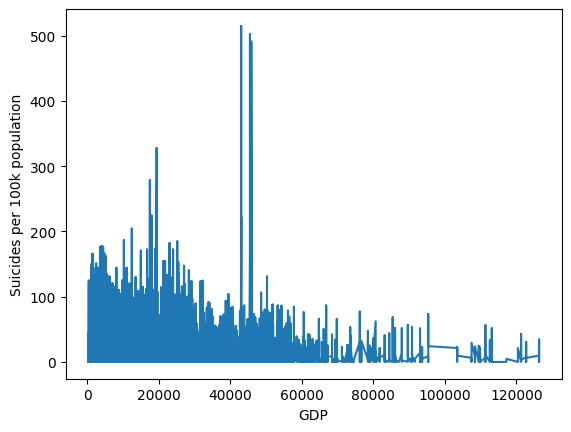

In [132]:
Y_copy = np.copy(Y_deathrate)
GDP = X[:,8].copy() #GDP per capita
#GDP = X[:,7].copy()

tmp = GDP.argsort()
GDP.sort()
Y_copy = Y_copy[tmp]

plt.plot(GDP,Y_copy)
plt.xlabel("GDP")
plt.ylabel("Suicides per 100k population")




Here we can see a clear indicator that GDP per capita does matter for the suicide rate of the population.
We now want to use some linear regression to try to analyze this data.

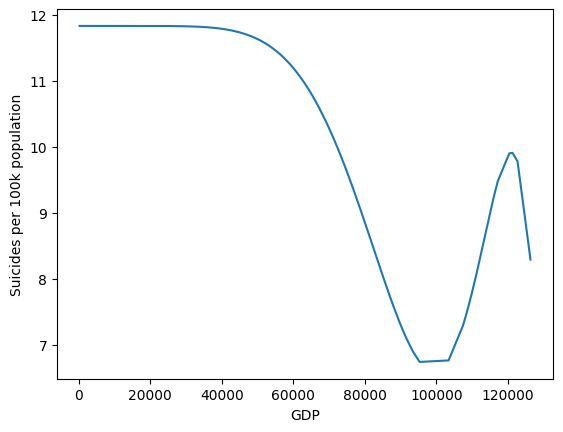

In [131]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(GDP.reshape(-1,1))
lin.fit(X_poly, Y_copy)


plt.plot(GDP, lin.predict(X_poly))
plt.xlabel("GDP")
plt.ylabel("Suicides per 100k population")
plt.show()

